# MBTI Personality Type Prediction (Binary Classification)

This notebook trains four binary classifiers to predict each of the MBTI personality type components (I/E, N/S, T/F, J/P) using NLP techniques and user-written text.

In [ ]:
# Install required packages
# !pip install pandas numpy scikit-learn nltk

## 1. Load and Preprocess Data

In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from google.colab import files

nltk.download('stopwords')
nltk.download('wordnet')

#uploaded = files.upload()
df = pd.read_csv('mbti_1.csv')

# Extract binary traits
df['IE'] = df['type'].apply(lambda x: 0 if x[0] == 'I' else 1)
df['NS'] = df['type'].apply(lambda x: 0 if x[1] == 'N' else 1)
df['TF'] = df['type'].apply(lambda x: 0 if x[2] == 'T' else 1)
df['JP'] = df['type'].apply(lambda x: 0 if x[3] == 'J' else 1)

# Clean text
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\|\|\|', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_posts'] = df['posts'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. TF-IDF Feature Extraction

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_posts'])

## 3. Train Binary Classifiers

In [3]:
from sklearn.linear_model import LogisticRegression

models = {}
traits = ['IE', 'NS', 'TF', 'JP']

for trait in traits:
    y = df[trait]
    model = LogisticRegression(class_weight='balanced', max_iter=1000)
    model.fit(X, y)
    models[trait] = model

## 4. Predict MBTI from User Input

Enter a sentence about yourself: I love party

🎯 Predicted MBTI Type: **ESFJ**

• Extraversion – You enjoy group activities and get energized by social interaction.
• Sensing – You focus on facts and the present moment.
• Feeling – You make decisions based on values and emotions.
• Judging – You prefer structure, planning, and organization.


<ipython-input-31-519ed3b1a604>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")


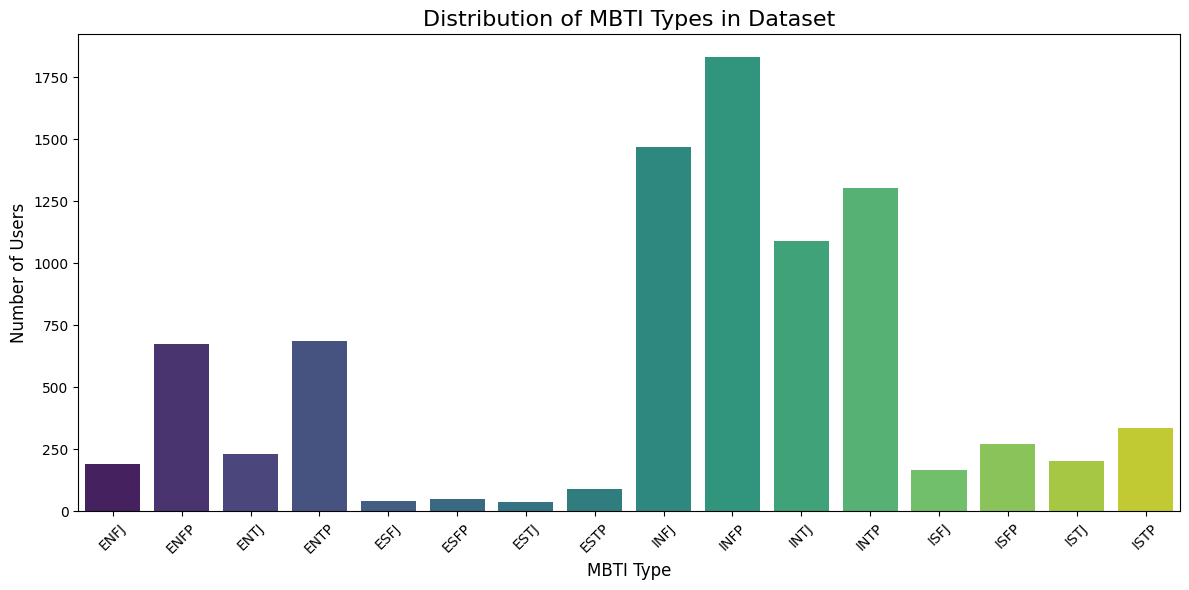

In [31]:
# User input
# 5. Predict MBTI from User Input with Detailed Output

# Get user input
user_input = input("Enter a sentence about yourself: ")

# Preprocess input
cleaned_input = clean_text(user_input)
vectorized_input = tfidf.transform([cleaned_input])

# Predict each trait
traits = {
    'IE': ('I', 'E'),
    'NS': ('N', 'S'),
    'TF': ('T', 'F'),
    'JP': ('J', 'P')
}

trait_descriptions = {
    'I': "Introversion – You prefer solitary activities and recharge by spending time alone.",
    'E': "Extraversion – You enjoy group activities and get energized by social interaction.",
    'N': "Intuition – You focus on ideas, patterns, and possibilities.",
    'S': "Sensing – You focus on facts and the present moment.",
    'T': "Thinking – You make decisions based on logic and objectivity.",
    'F': "Feeling – You make decisions based on values and emotions.",
    'J': "Judging – You prefer structure, planning, and organization.",
    'P': "Perceiving – You are adaptable, spontaneous, and go with the flow."
}

# Build predicted MBTI type
mbti_type = ""
details = []

for trait, (low, high) in traits.items():
    prediction = models[trait].predict(vectorized_input)[0]
    letter = low if prediction == 0 else high
    mbti_type += letter
    details.append(trait_descriptions[letter])

# Display result
print(f"\n🎯 Predicted MBTI Type: **{mbti_type}**\n")
for desc in details:
    print(f"• {desc}")

import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of samples for each MBTI type in the dataset
type_counts = df['type'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
plt.title("Distribution of MBTI Types in Dataset", fontsize=16)
plt.xlabel("MBTI Type", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

